/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

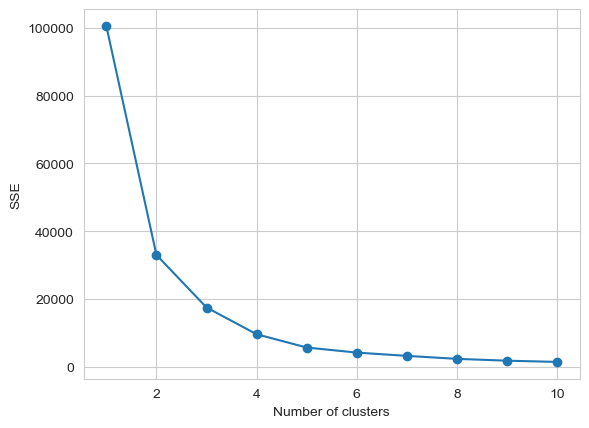

/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (original scale): [[25.55858463]
 [47.06403796]
 [35.66379565]]
Silhouette Score: 0.5315661195893135


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('f1_2019_to_2023_all_drivers_all_data.csv', low_memory=False)

# Scale the TrackTemp data
scaler = StandardScaler()
df['TrackTemp_scaled'] = scaler.fit_transform(df[['TrackTemp']])

# Use the elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['TrackTemp_scaled']])
    sse.append(kmeans.inertia_)

# Plot SSE to find the elbow
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the elbow is at k = 3 for instance
kmeans = KMeans(n_clusters=3, random_state=42)
df['TrackTempCluster'] = kmeans.fit_predict(df[['TrackTemp_scaled']])
print("Cluster Centers (original scale):", scaler.inverse_transform(kmeans.cluster_centers_))

# Evaluate silhouette score
score = silhouette_score(df[['TrackTemp_scaled']], df['TrackTempCluster'])
print("Silhouette Score:", score)


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('f1_2019_to_2023_all_drivers_all_data.csv', low_memory=False)

# Check and handle missing values
df['TrackTemp'].fillna(df['TrackTemp'].mean(), inplace=True)

# Scale the TrackTemp data
scaler = StandardScaler()
df['TrackTemp_scaled'] = scaler.fit_transform(df[['TrackTemp']])

# Apply k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
df['TrackTempCluster'] = kmeans.fit_predict(df[['TrackTemp_scaled']])

# Output the cluster centers in the original scale
cluster_centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):", cluster_centers_original_scale)

# Evaluate silhouette score
score = silhouette_score(df[['TrackTemp_scaled']], df['TrackTempCluster'])
print("Silhouette Score:", score)


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (original scale): [[32.56661739]
 [50.45227637]
 [43.16390257]
 [17.80163754]
 [27.242491  ]
 [37.67602556]]
Silhouette Score: 0.5533903423538764


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

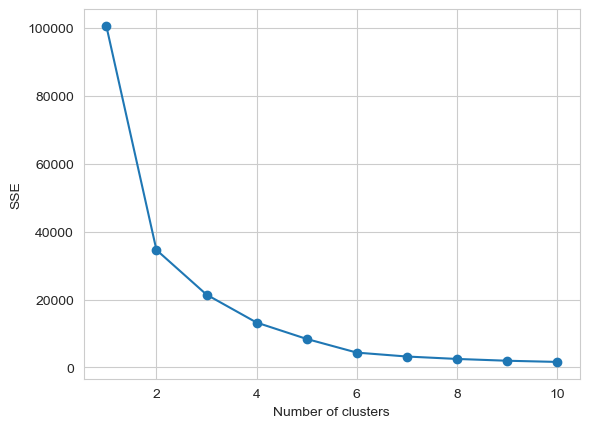

/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (original scale): [[28.31487626]
 [16.8149051 ]
 [22.02289423]]
Silhouette Score: 1.0


In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
import pandas as pd


# Load dataset
df = pd.read_csv('f1_2019_to_2023_all_drivers_all_data.csv', low_memory=False)

# Convert time columns to seconds
time_columns = ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']
for col in time_columns:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()

# Convert binary columns to integer type
df['Rainfall'] = df['Rainfall'].astype(int)
df['FreshTyre'] = df['FreshTyre'].astype(int)
df['IsAccurate'] = df['IsAccurate'].astype(int)


# Categorize weather condition based on centroid values of Kmeans clustering
def categorize_weather(row):
    if row['Rainfall'] > 0:
        return 'Rainy'
    elif row['AirTemp'] > 28.43213126:
        return 'high'
    elif row['AirTemp'] > 21.31279265:
        return 'medium'
    elif row['AirTemp'] > 12.84901403:
        return 'low'
    else:
        return 'very_low'

df['Weather_Category'] = df.apply(categorize_weather, axis=1)
df['Original_Weather_Category'] = df['Weather_Category']
df = pd.get_dummies(df, columns=['Weather_Category'])


# Keep the original Driver and Circuit for EDA
df['Original_Driver'] = df['Driver']

# Create Track temperature category based on the result of Kmeans clustering 
df['TrackTemp_Cat'] = pd.cut(df['TrackTemp'], bins=[0, 18.96764999, 27.87457484, 35.04425766, 41.75142602, 50.51006013], labels=['VERY_LOW', 'Low', 'Medium', 'Warm', 'High'])
df['Original_TrackTemp_Cat'] = df['TrackTemp_Cat']
df = pd.get_dummies(df, columns=['TrackTemp_Cat'])


#Feature Engineering with weather condition features
df['TrackConditionIndex'] = ( df['TrackTemp'] + df['Humidity'] + df['Pressure'] +
                             df['WindDirection']) / 4


# One-hot encoding
df = pd.get_dummies(df, columns=['Driver', 'Compound', 'Team','TrackStatus'])

# Drop irrelevant columns
columns_to_drop = ['Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                   'PitOutTime', 'PitInTime', 'LapStartDate', 'Deleted', 'DeletedReason', 'FastF1Generated',
                   'IsPersonalBest', 'Sector3Time','LapStartTime','Sector2Time','Sector1Time','Circuit']
df.drop(columns=columns_to_drop, inplace=True)


# Select numerical values for scaling and imputation
numeric_features = ['Humidity', 'Pressure', 'WindDirection', 'WindSpeed','TrackTemp','AirTemp','TrackConditionIndex','Rainfall','SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']

# Example for forward fill
#time_series_features = ['WindDirection', 'WindSpeed', 'TrackTemp', 'AirTemp', 'Rainfall', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']

df[numeric_features] = df[numeric_features].fillna(method='ffill')


## Separate Rainy / dry days ##
# 1. Separate LapTime as dry or wet(rainy) condition ( since lapTime of rainy day would be recognized as outliers)
# 2. Remove Outliers for dry condition LapTime
# 3. Build Combined LapTime df (Outliers for dry days are deleted)

# Flag for rainy conditions
df['IsRainy'] = df['Rainfall'].apply(lambda x: 1 if x > 0 else 0)

# Separate dataframes for dry and wet conditions
df_dry = df[df['IsRainy'] == 0]
df_wet = df[df['IsRainy'] == 1]

# Remove Outliers for dry days using the IQR method that effective to removes extreme outliers
Q1_dry = df_dry['LapTime'].quantile(0.25)
Q3_dry = df_dry['LapTime'].quantile(0.75)
IQR_dry = Q3_dry - Q1_dry
lower_bound_dry = Q1_dry - 1.5 * IQR_dry
upper_bound_dry = Q3_dry + 1.5 * IQR_dry
df_dry_filtered = df_dry[(df_dry['LapTime'] >= lower_bound_dry) & (df_dry['LapTime'] <= upper_bound_dry)]
df_dry_filtered = df_dry_filtered.copy()
df_wet = df_wet.copy()


## Scaling to the selected numeric features ##
robust_scaler = RobustScaler()

# Applying scaling to the numeric features
df_dry_filtered[numeric_features] = robust_scaler.fit_transform(df_dry_filtered[numeric_features])
df_wet[numeric_features] = robust_scaler.transform(df_wet[numeric_features])  # Use transform, not fit_transform

# Combining the datasets after scaling
df_combined = pd.concat([df_dry_filtered, df_wet], ignore_index=True)
df_combined.info(verbose=True)

In [ ]:
# 1. Separate LapTime as dry or wet(rainy) condition ( since lapTime of rainy day would be recognized as outliers)
# 2. Remove Outliers for dry condition LapTime
# 3. Build Combine

import pandas as pd
import matplotlib.pyplot as plt


correlation_matrix= df_combined[numeric_features + ['LapTime']].corr(method='spearman')

# Focus on 'LapTime' correlations
laptime_correlations = correlation_matrix['LapTime'].drop('LapTime')  # drop self-correlation

# Convert correlations to percentage and sort in descending order
laptime_correlations_percentage = laptime_correlations * 100
laptime_correlations_sorted = laptime_correlations_percentage.sort_values(ascending=False)

# Convert to list and format the output
laptime_correlations_list = [(f"{index}: {value:.2f}%") for index, value in laptime_correlations_sorted.items()]

# Print the formatted list
for item in laptime_correlations_list:
    print(item)

# Optionally, visualize the correlations in descending order
plt.figure(figsize=(10, 8))
laptime_correlations_sorted.plot(kind='bar')
plt.title('Percentage Correlation of LapTime with Other Variables')
plt.ylabel('Correlation Percentage')
plt.xlabel('Variables')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Prepare the data (assuming df_combined is already loaded and cleaned)
humidity_data = df_combined[['Humidity']].dropna()  # Ensuring there are no NaN values

# Step 2: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Explicitly setting n_init

clusters = kmeans.fit_predict(humidity_data)

# Step 3: Create a new categorical feature
df_combined['HumidityCat'] = clusters

# Optionally add more descriptive labels based on the cluster characteristics
# For example, after inspecting cluster centers:
cluster_centers = kmeans.cluster_centers_
sorted_indices = np.argsort(cluster_centers.squeeze())  # Sort clusters by humidity level
labels = ['Low', 'Medium', 'High']
df_combined['HumidityCat'] = df_combined['HumidityCat'].map({idx: labels[i] for i, idx in enumerate(sorted_indices)})

# Step 4: Visualize the Results
# Plotting histograms for each cluster to visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Humidity', hue='HumidityCat', element='step', palette='viridis')
plt.title('Humidity Distribution Across Clusters')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='LapTime', hue='Rainfall', element='step', stat='density', common_norm=False)
plt.title('Lap Time Distribution by Rainfall Condition')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(10, 6))

# Create histogram
sns.histplot(
    data=df_combined,
    x='LapTime',
    hue='Rainfall',
    element='step',
    stat='density',
    common_norm=False,
    palette='coolwarm',  # Improved color palette
    edgecolor='black'    # Adding edge color for clarity
)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add titles and labels
plt.title('Lap Time Distribution by Rainfall Condition')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')

# Optional: Add vertical lines for mean or median
mean_laptime = df_combined['LapTime'].mean()
plt.axvline(mean_laptime, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_laptime*1.01, plt.ylim()[1]*0.95, 'Mean', color='red')

# Show the plot
plt.show()


In [ ]:
# Example analysis: Comparing average lap times in dry vs. wet conditions
average_laptime_dry = df_dry_filtered['LapTime'].mean()
average_laptime_wet = df_wet['LapTime'].mean()
average_Combined = df_combined['LapTime'].mean()

print(f"Average dry lap time: {average_laptime_dry} seconds")
print(f"Average wet lap time: {average_laptime_wet} seconds")
print(f"Combined lap time: {average_Combined} seconds")



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Visualization: Histogram
plt.figure(figsize=(10, 6))

# Plot histogram for dry days
sns.histplot(df_dry_filtered['LapTime'], kde=True, label='Dry (Outliers Removed)', color='blue')

# Plot histogram for wet days
sns.histplot(df_wet['LapTime'], kde=True, label='Wet', color='green')

# Plotting details
plt.title('Lap Times by Dry and Wet Conditions')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Frequency')
plt.legend(title='Condition')
plt.show()

# EDA - Visualization: Box Plot
plt.figure(figsize=(10, 6))

# Create a temporary DataFrame to combine dry and wet data for the box plot
temp_df = pd.concat([
    df_dry_filtered.assign(Condition='Dry (Outliers Removed)'),
    df_wet.assign(Condition='Wet')
], ignore_index=True)

sns.boxplot(x='Condition', y='LapTime', data=temp_df)

plt.title('Lap Times Under Dry and Wet Conditions')
plt.xlabel('Condition')
plt.ylabel('Lap Time (seconds)')
plt.show()


In [ ]:
#EDA - Visualization

plt.figure(figsize=(10, 6))

# Unique categories in the 'Original_Weather_Category' column
weather_categories = df['Original_Weather_Category'].unique()
# Plot histogram for each weather category
for category in weather_categories:
    # Select lap times for the current category
    category_lap_times = df[df['Original_Weather_Category'] == category]['LapTime']
    # Plot the distribution of lap times for the category
    sns.histplot(category_lap_times, kde=True, label=category)
    
# Plotting
plt.title('Lap Times by Weather Condition')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Frequency')
plt.legend(title='Weather Condition')
plt.show()


# Second graph with box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Original_Weather_Category', y='LapTime', data=df)
plt.title('Lap Times Under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Lap Time (seconds)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Original_TrackTemp_Cat', y='LapTime', data=df_combined)
plt.title('Lap Times Across Different Track Temperatures')
plt.xlabel('Track Temperature Category')
plt.ylabel('Lap Time (seconds)')
plt.show()

In [ ]:
some_string = df_combined['some_column'].iloc[0]  # Example of fetching a string from a DataFrame column
if some_string is not None:
    parts = some_string.split()  # This will safely execute only if `some_string` is not None
else:
    parts = []  # or any other fallback value


In [ ]:
from sklearn.cluster import KMeans
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)



# Fit KMeans on the 'Humidity' column and create a new column for the cluster labels
df_combined['HumidityCluster'] = kmeans.fit_predict(df_combined[['Humidity']])

# Optionally, add the cluster centroids as a new feature for further analysis or to interpret clusters
centroids = kmeans.cluster_centers_
df_combined['HumidityCentroid'] = df_combined['HumidityCluster'].apply(lambda x: centroids[x][0])

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Humidity', y='LapTime', hue='HumidityCluster', palette='viridis')
plt.title('Lap Time vs. Humidity with K-Means Clustering')
plt.xlabel('Humidity (%)')
plt.ylabel('Lap Time (seconds)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

#K-Means to determine thresholds, The centroids of these clusters could reflect potential thresholds.

kmeans = KMeans(n_clusters=3)
df['AirTempCluster'] = kmeans.fit_predict(df[['AirTemp']])

# Check the cluster centers for AirTemp
print(kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=7)  

df['TrackTempCluster'] = kmeans.fit_predict(df[['TrackTemp']])

print(kmeans.cluster_centers_)